<h1 style="background-color: #4CAF50; color: #ffffff; padding: 10px; border-radius: 8px; text-align: center;">
  Import Libraries and Load Dataset
</h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from datetime import datetime

warnings.filterwarnings("ignore")
df=pd.read_csv("/kaggle/input/global-black-money-transactions-dataset/Big_Black_Money_Dataset.csv")
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [2]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])

<h1 style="background-color: #4CAF50; color: #ffffff; padding: 10px; border-radius: 8px; text-align: center;">
  Univariate Analysis
</h1>


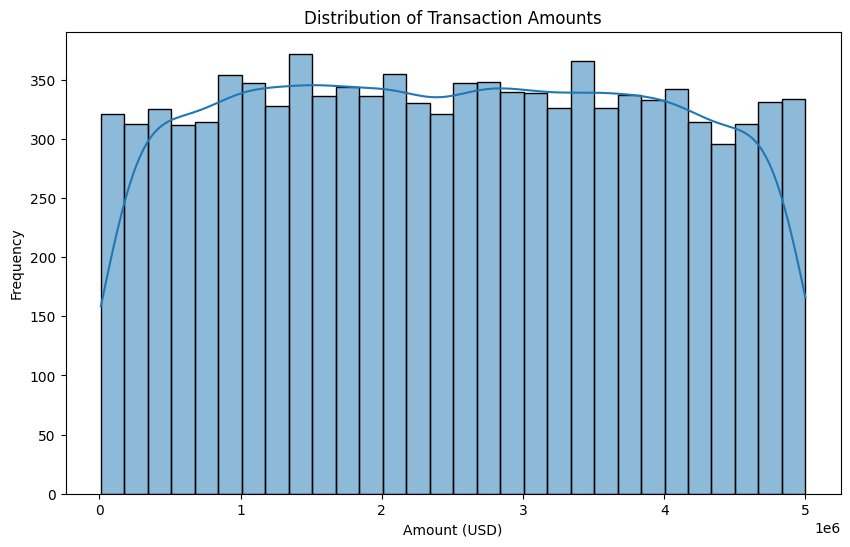

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount (USD)'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()


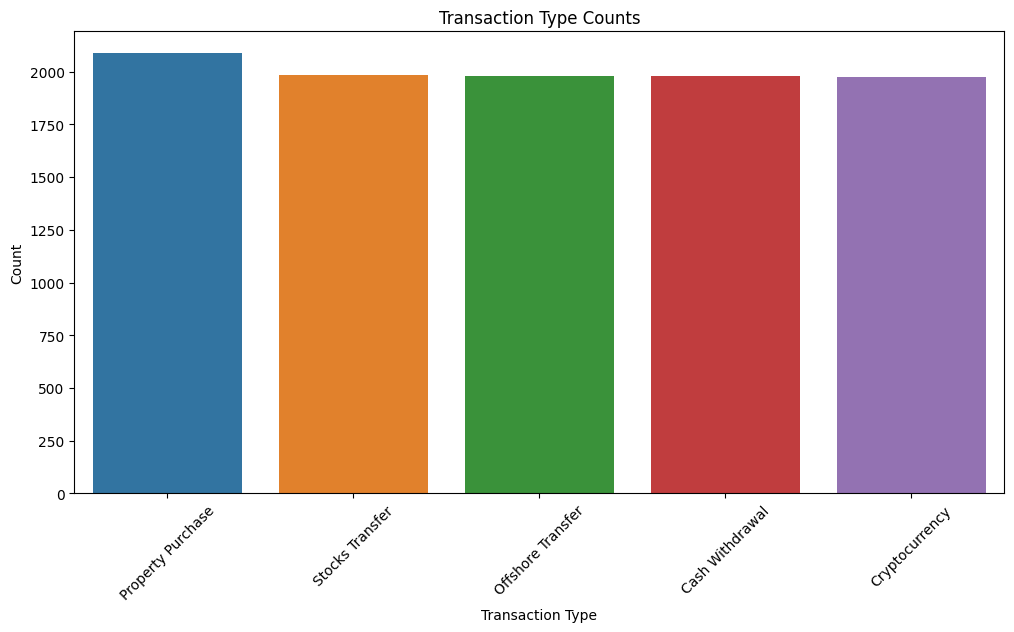

In [4]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Transaction Type', order=df['Transaction Type'].value_counts().index)
plt.title('Transaction Type Counts')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()


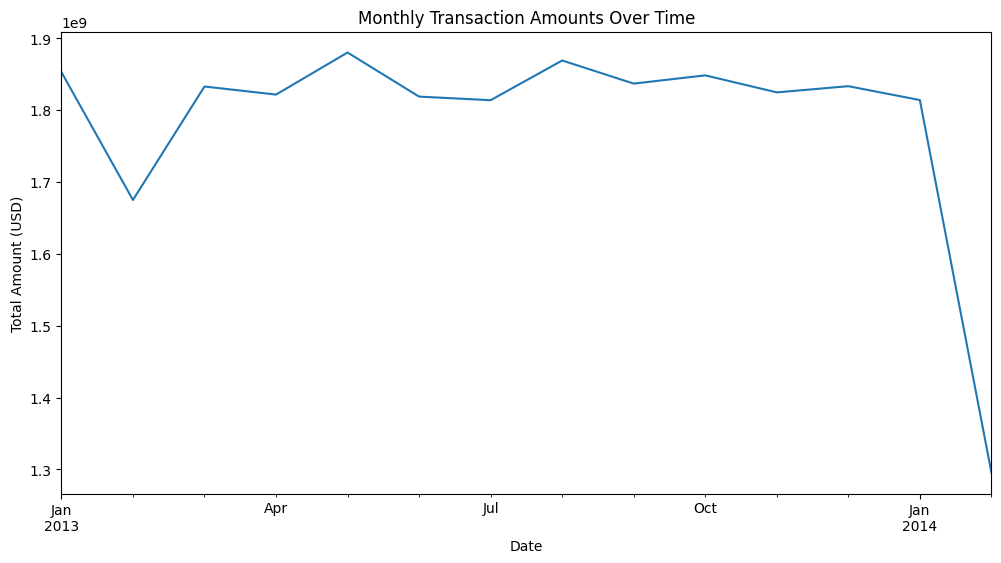

In [5]:
plt.figure(figsize=(12, 6))
df.set_index('Date of Transaction').resample('M')['Amount (USD)'].sum().plot()
plt.title('Monthly Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount (USD)')
plt.show()


<h1 style="background-color: #4CAF50; color: #ffffff; padding: 10px; border-radius: 8px; text-align: center;">
  Bivariate Analysis
</h1>


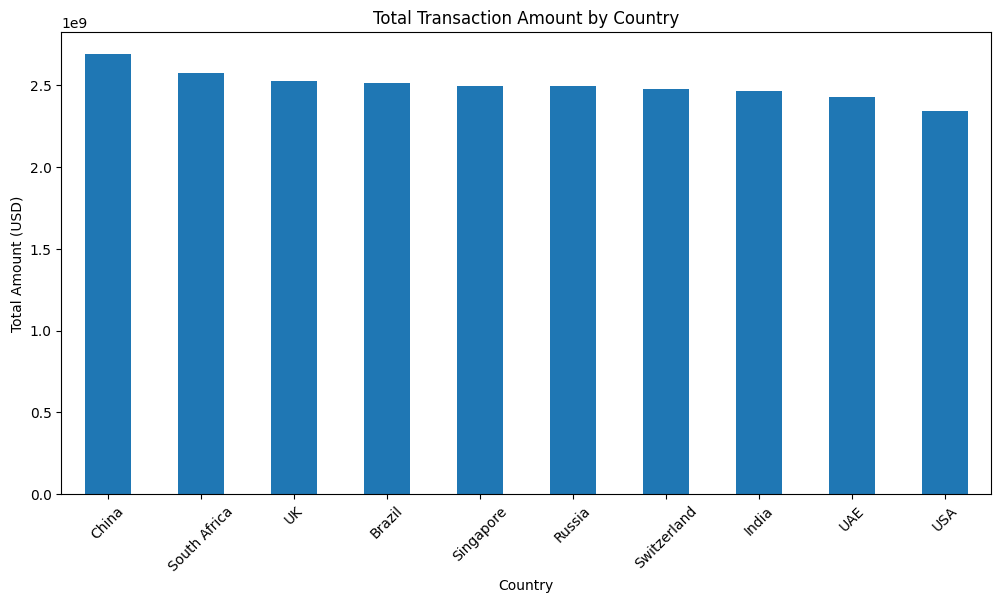

In [6]:
plt.figure(figsize=(12, 6))
country_totals = df.groupby('Country')['Amount (USD)'].sum().sort_values(ascending=False)
country_totals.plot(kind='bar')
plt.title('Total Transaction Amount by Country')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.show()


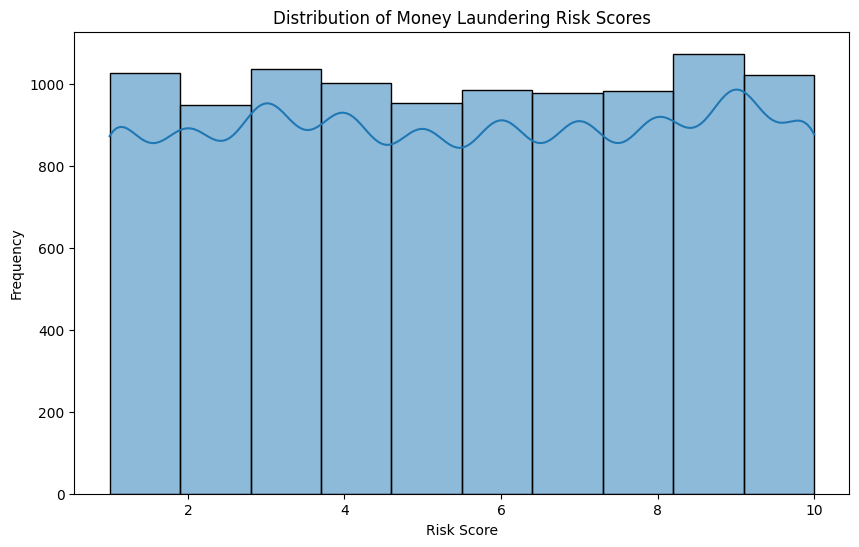

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Money Laundering Risk Score'], bins=10, kde=True)
plt.title('Distribution of Money Laundering Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()


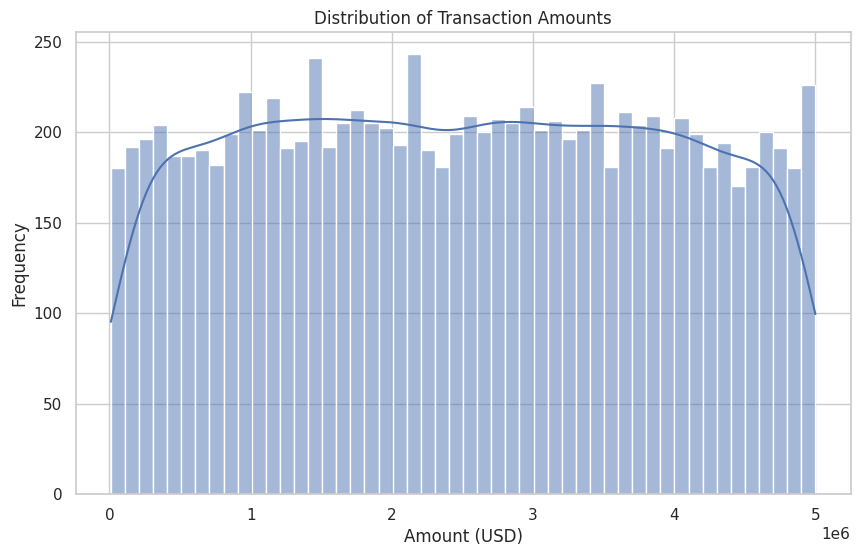

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount (USD)'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (USD)')
plt.ylabel('Frequency')
plt.show()

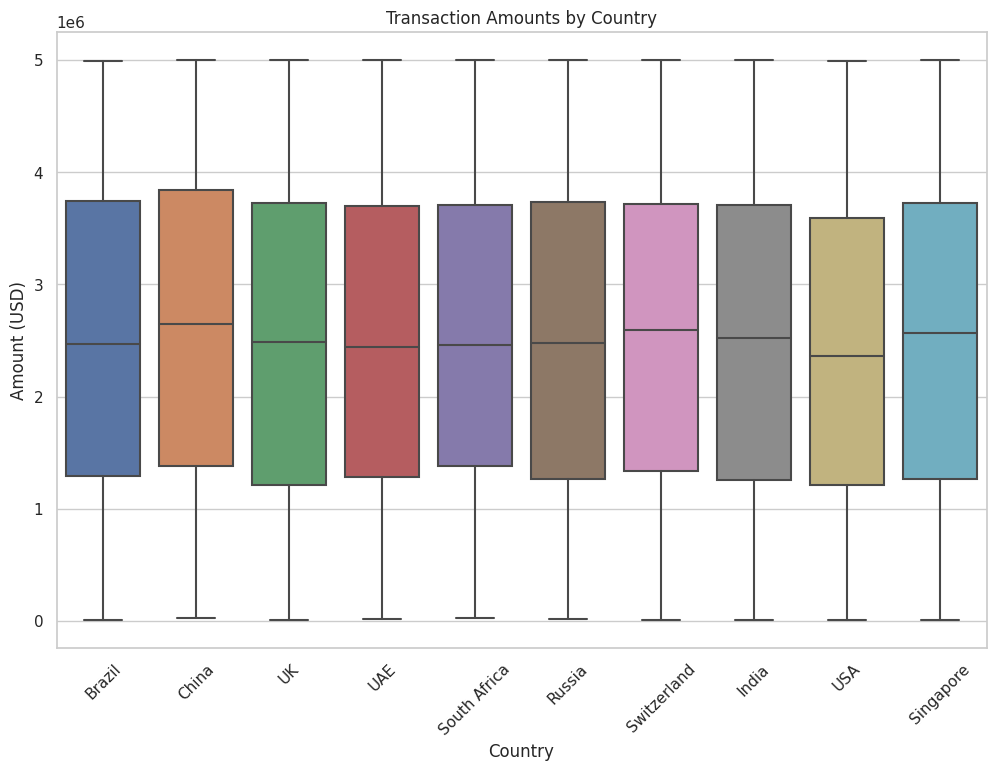

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Country', y='Amount (USD)')
plt.title('Transaction Amounts by Country')
plt.xticks(rotation=45)
plt.show()

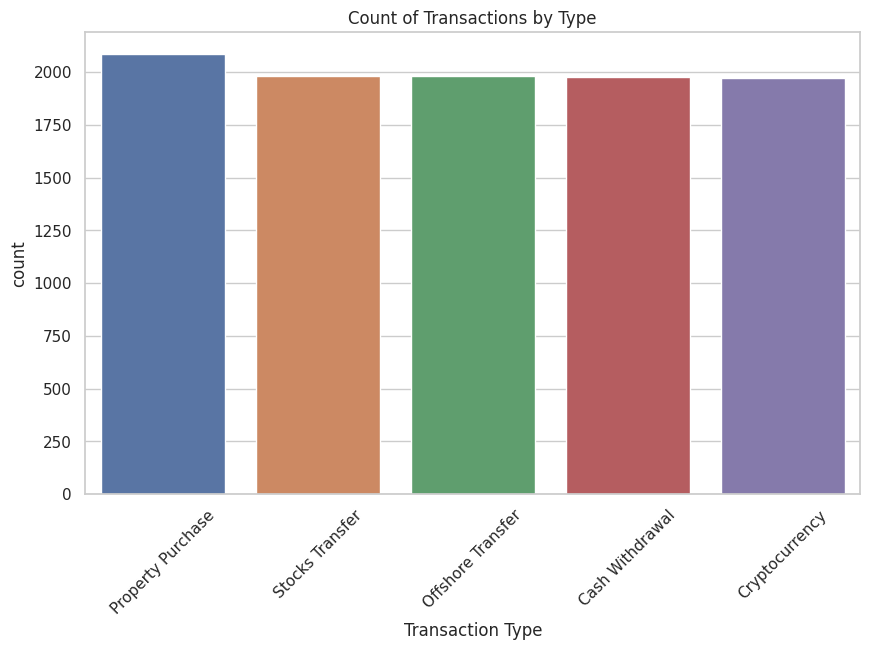

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Transaction Type', order=df['Transaction Type'].value_counts().index)
plt.title('Count of Transactions by Type')
plt.xticks(rotation=45)
plt.show()

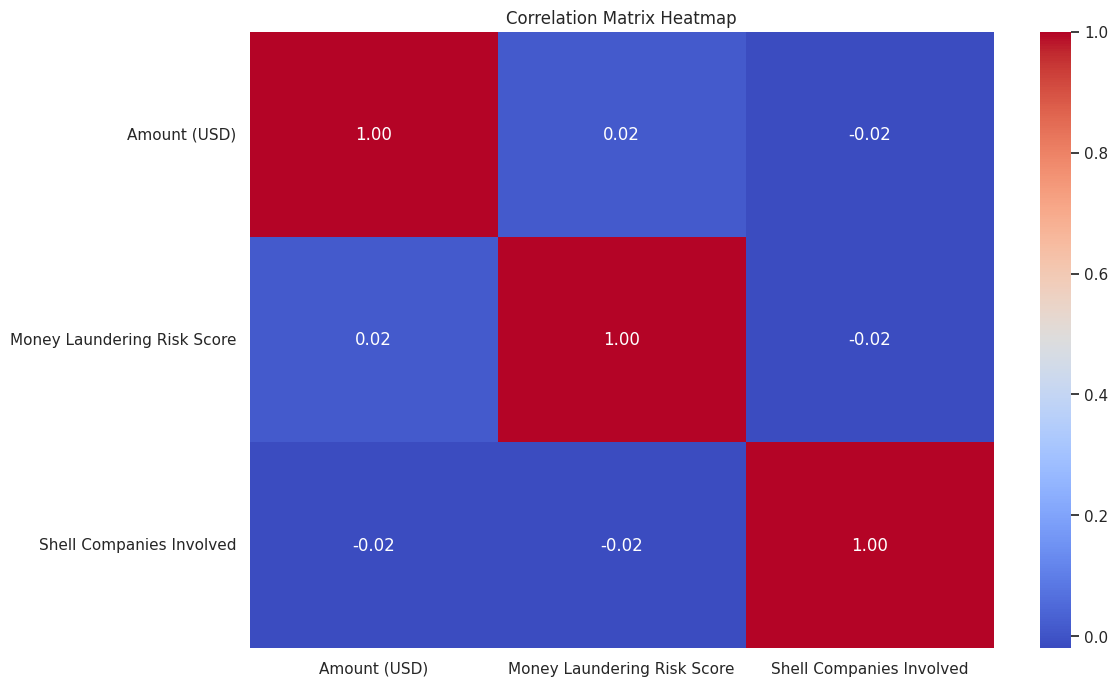

In [11]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


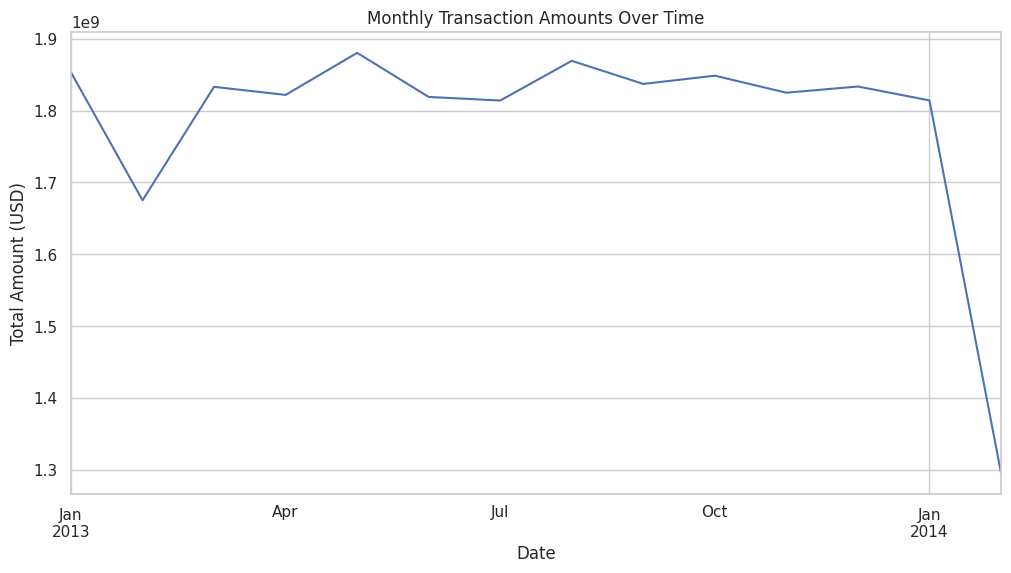

In [12]:
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])
df.set_index('Date of Transaction', inplace=True)
df.resample('M')['Amount (USD)'].sum().plot(figsize=(12, 6))
plt.title('Monthly Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount (USD)')
plt.show()

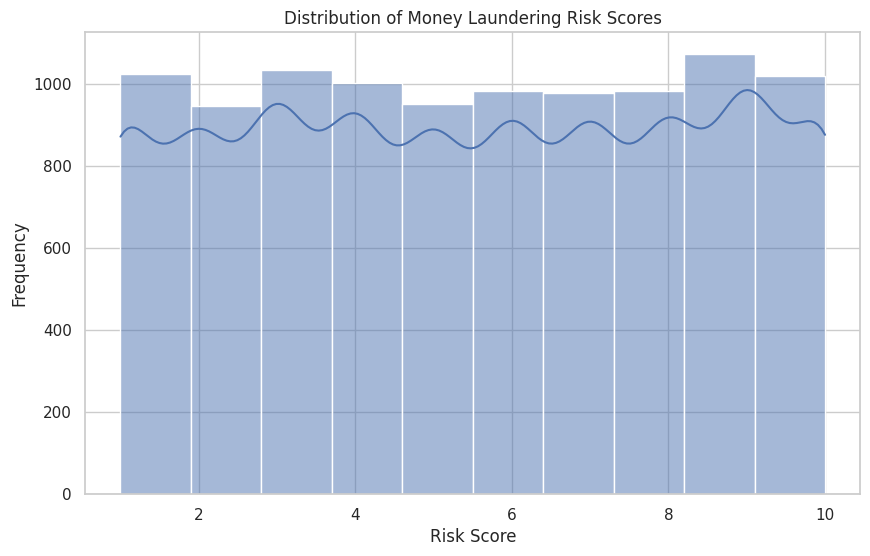

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Money Laundering Risk Score'], bins=10, kde=True)
plt.title('Distribution of Money Laundering Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

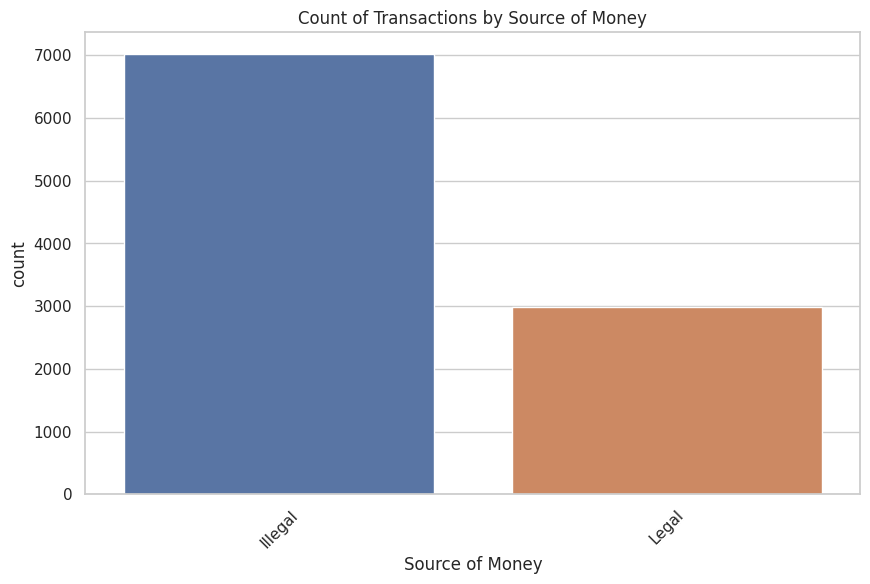

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Source of Money', order=df['Source of Money'].value_counts().index)
plt.title('Count of Transactions by Source of Money')
plt.xticks(rotation=45)
plt.show()


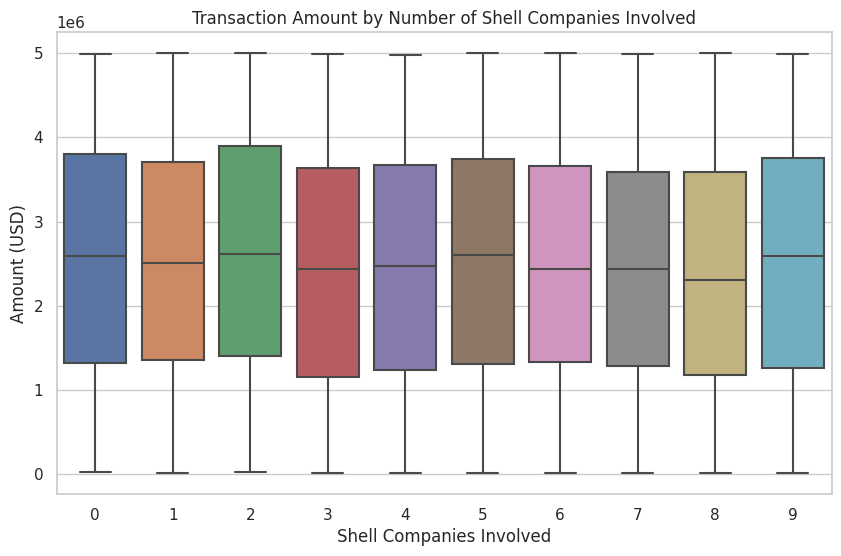

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Shell Companies Involved', y='Amount (USD)')
plt.title('Transaction Amount by Number of Shell Companies Involved')
plt.xlabel('Shell Companies Involved')
plt.ylabel('Amount (USD)')
plt.show()

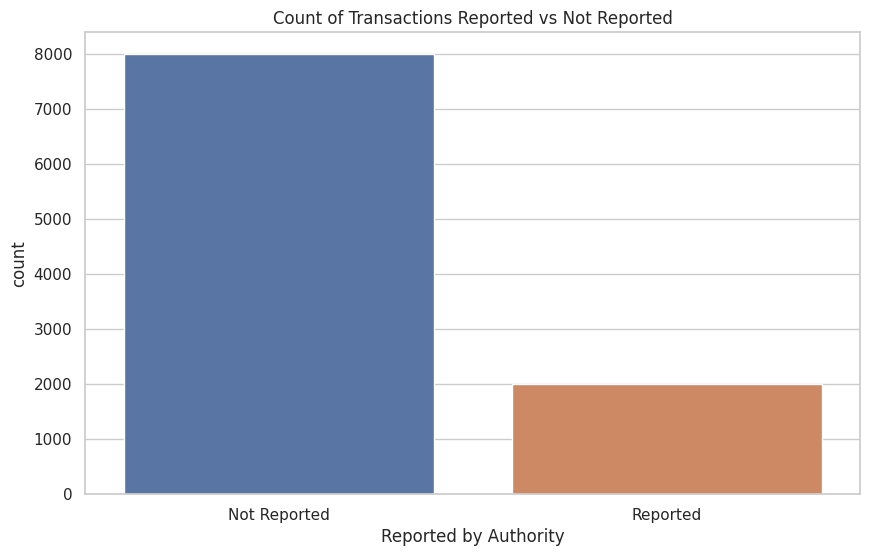

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Reported by Authority')
plt.title('Count of Transactions Reported vs Not Reported')
plt.xticks([0, 1], ['Not Reported', 'Reported'])
plt.show()


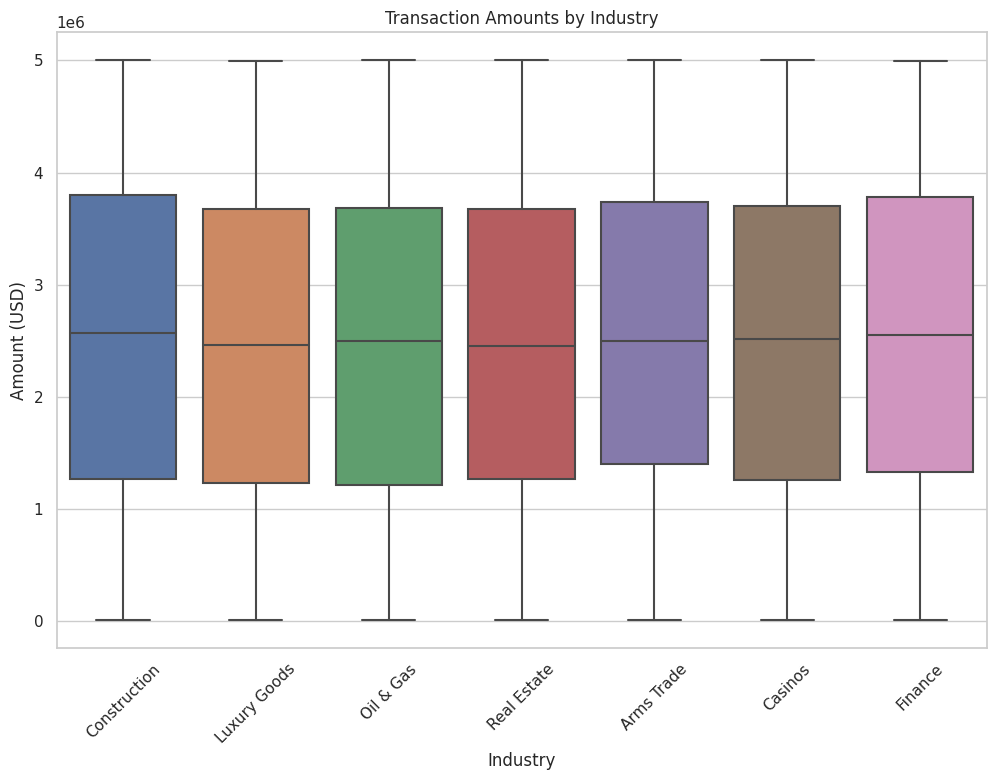

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Industry', y='Amount (USD)')
plt.title('Transaction Amounts by Industry')
plt.xticks(rotation=45)
plt.show()

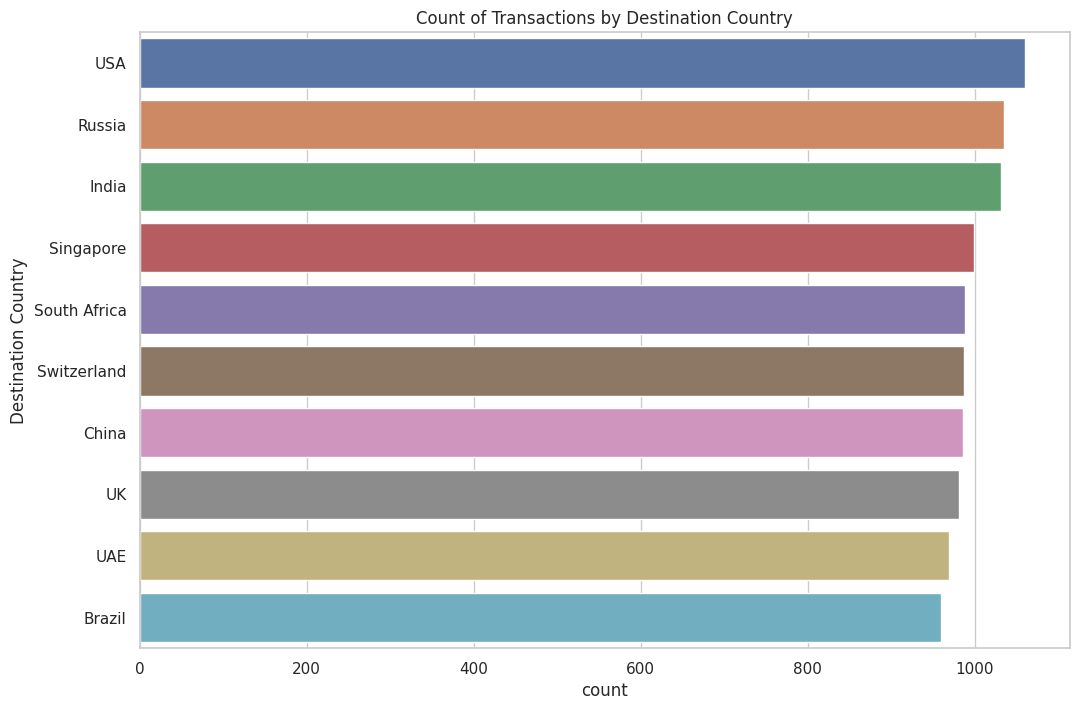

In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Destination Country', order=df['Destination Country'].value_counts().index)
plt.title('Count of Transactions by Destination Country')
plt.show()

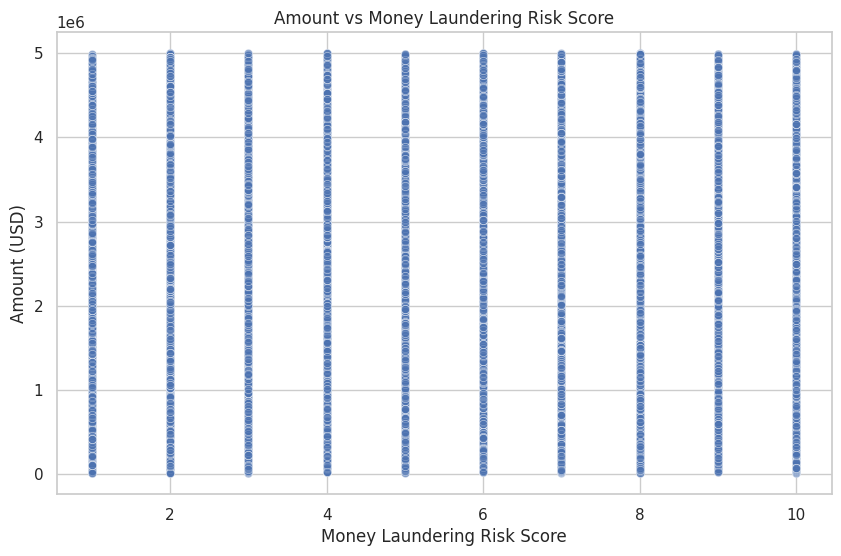

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Money Laundering Risk Score', y='Amount (USD)', alpha=0.6)
plt.title('Amount vs Money Laundering Risk Score')
plt.xlabel('Money Laundering Risk Score')
plt.ylabel('Amount (USD)')
plt.show()

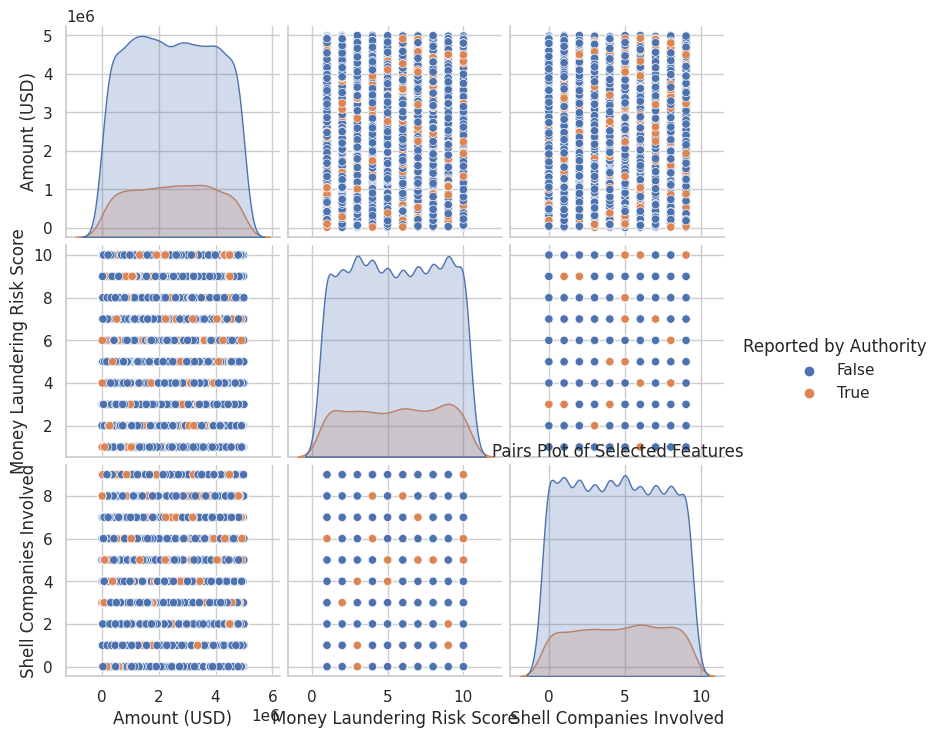

In [20]:
sns.pairplot(df, vars=['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved'], hue='Reported by Authority')
plt.title('Pairs Plot of Selected Features')
plt.show()


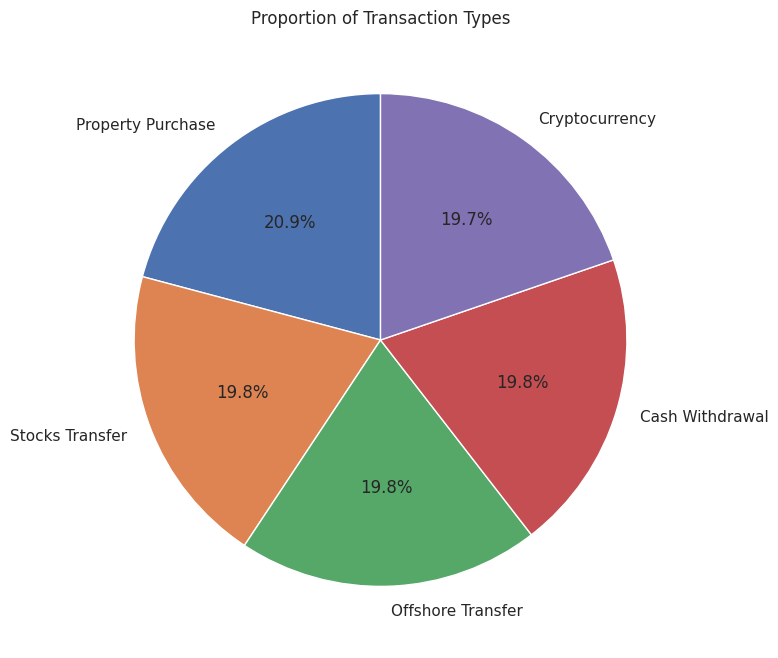

In [21]:
plt.figure(figsize=(8, 8))
df['Transaction Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Transaction Types')
plt.ylabel('')
plt.show()

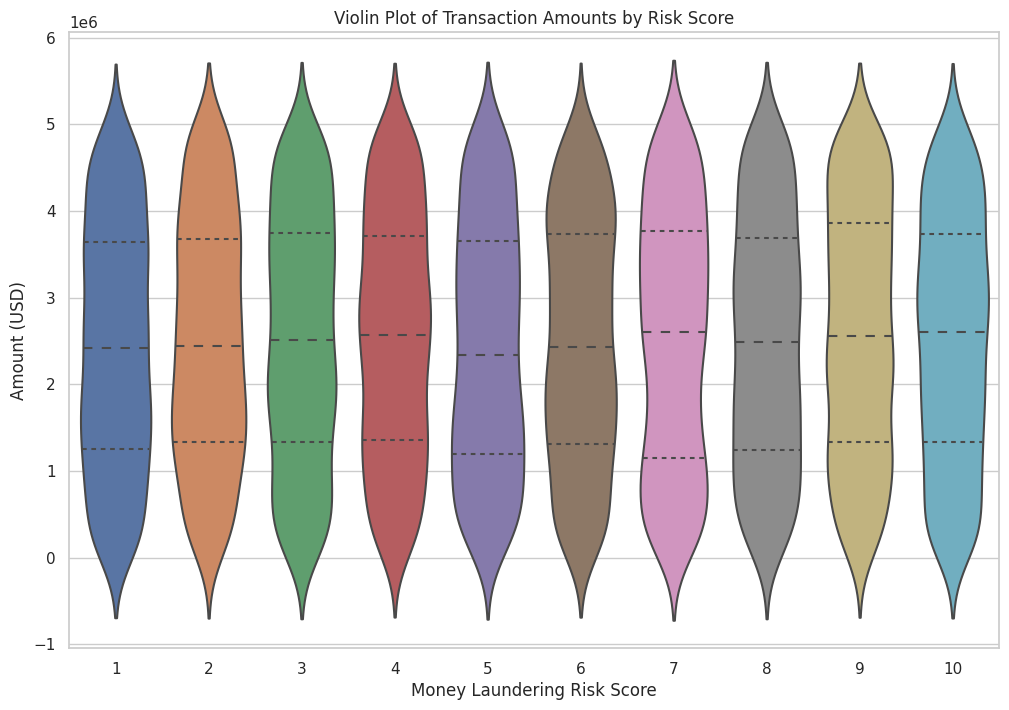

In [22]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Money Laundering Risk Score', y='Amount (USD)', inner='quartile')
plt.title('Violin Plot of Transaction Amounts by Risk Score')
plt.xlabel('Money Laundering Risk Score')
plt.ylabel('Amount (USD)')
plt.show()

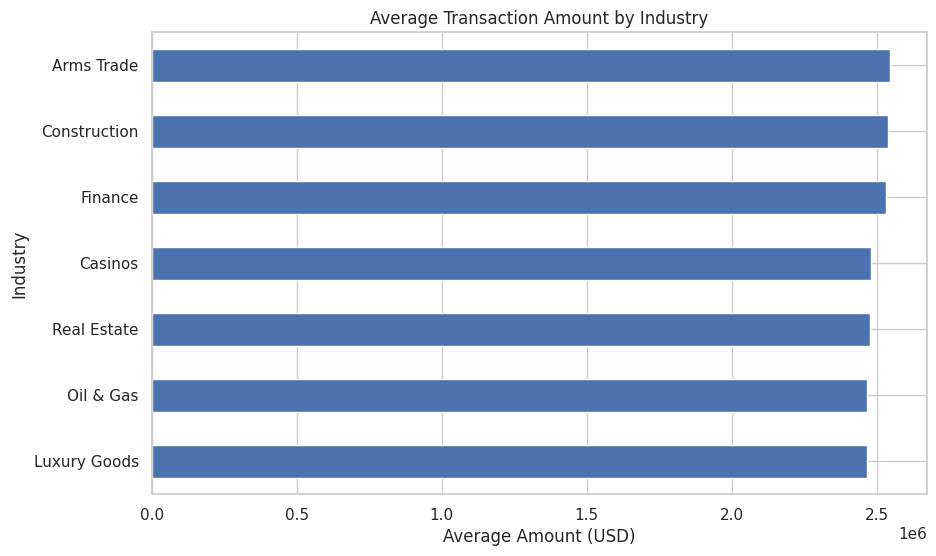

In [23]:
plt.figure(figsize=(10, 6))
avg_amount_by_industry = df.groupby('Industry')['Amount (USD)'].mean().sort_values()
avg_amount_by_industry.plot.barh()
plt.title('Average Transaction Amount by Industry')
plt.xlabel('Average Amount (USD)')
plt.show()


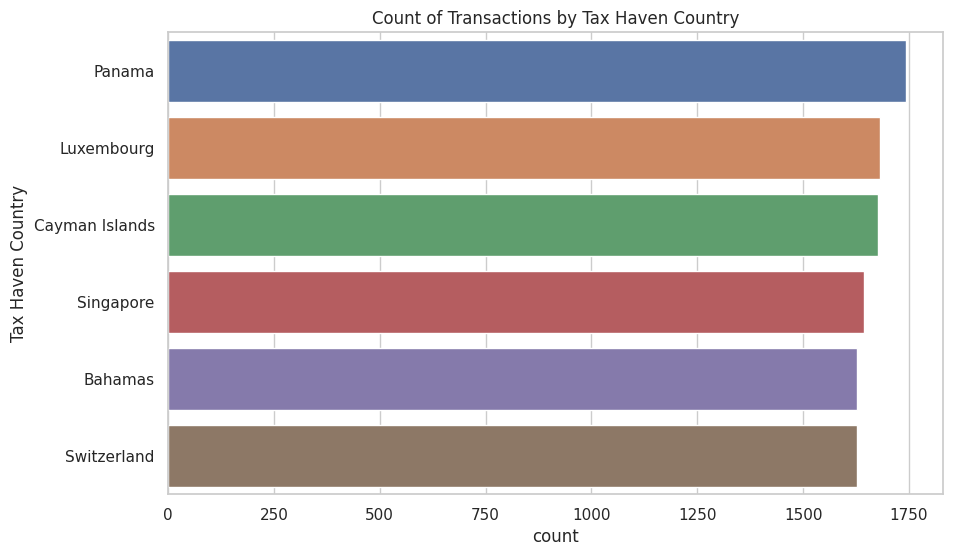

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Tax Haven Country', order=df['Tax Haven Country'].value_counts().index)
plt.title('Count of Transactions by Tax Haven Country')
plt.show()


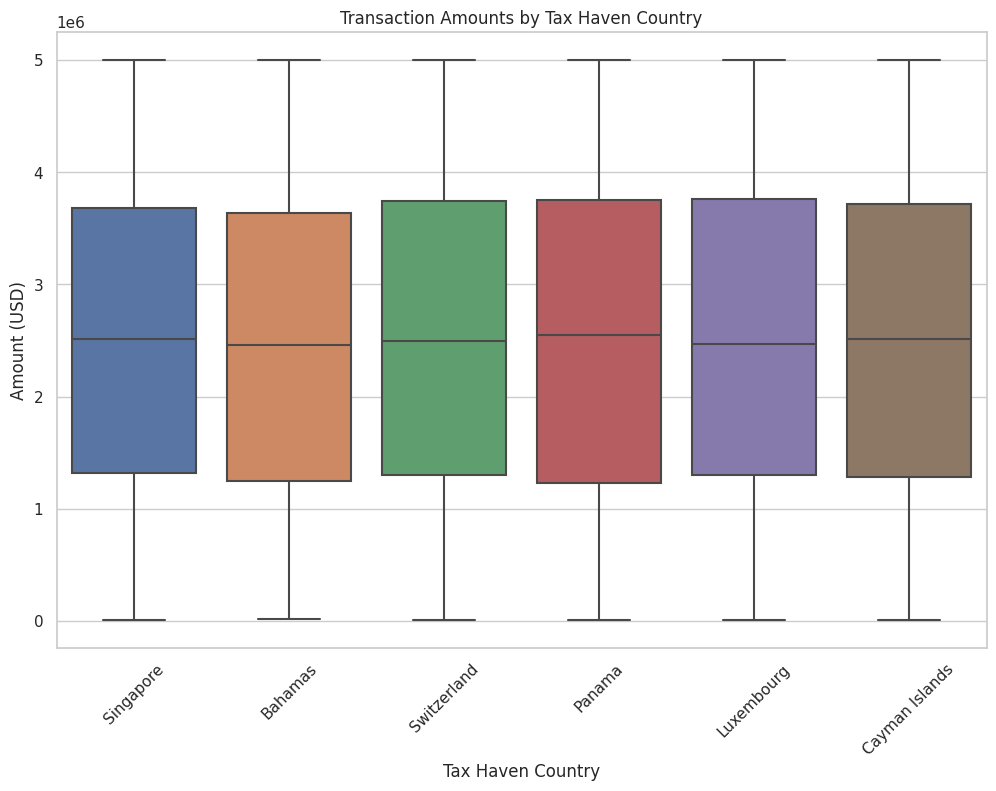

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Tax Haven Country', y='Amount (USD)')
plt.title('Transaction Amounts by Tax Haven Country')
plt.xticks(rotation=45)
plt.show()

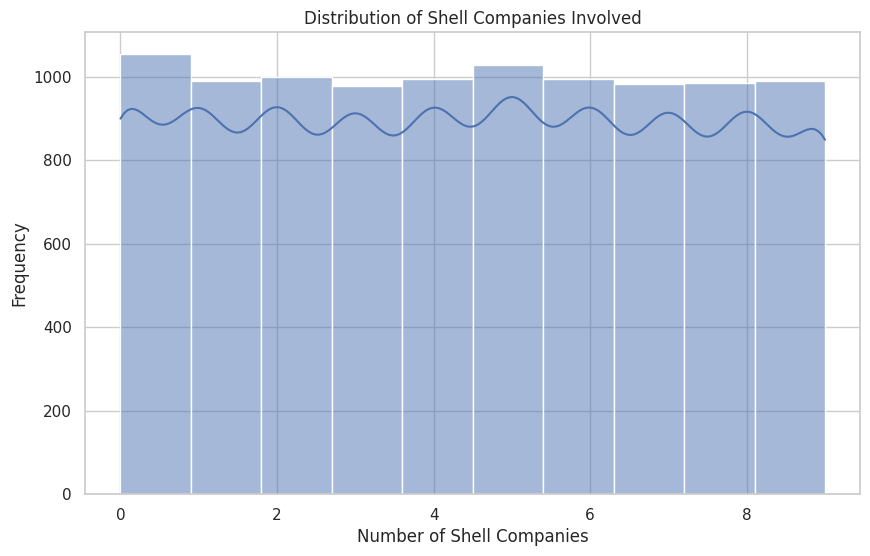

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Shell Companies Involved'], bins=10, kde=True)
plt.title('Distribution of Shell Companies Involved')
plt.xlabel('Number of Shell Companies')
plt.ylabel('Frequency')
plt.show()

<h2 style="background-color: #f2f2f2; color: #FFD700; padding: 10px; border-radius: 8px; text-align: center;">
  Thank You for Viewing! Please Upvote if You Found This Helpful!
</h2>
